### IMPORTANDO Y CARGANDO LAS LIBRERIAS

---





In [1]:
%cd C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python\Facebook Prophet

c:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python\Facebook Prophet


In [6]:
#IMPORTAMOS LAS LIBRERIAS
import itertools
import prophet
import pandas as pd
import numpy as np

In [8]:
#OBTENEMOS LOS DATOS
data = pd.read_csv("Daily Bike Sharing.csv")
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [15]:
#incluimos dteday en las columnas 
dataset = data.loc[:, ["dteday","cnt", "holiday", "workingday", "weathersit",
                       "temp", "atemp", "hum", "windspeed"]]
dataset.head()

,dteday,cnt,holiday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446
1,2011-01-02,801,0,0,2,0.363478,0.353739,0.696087,0.248539
2,2011-01-03,1349,0,1,1,0.196364,0.189405,0.437273,0.248309
3,2011-01-04,1562,0,1,1,0.200000,0.212122,0.590435,0.160296
4,2011-01-05,1600,0,1,1,0.226957,0.229270,0.436957,0.186900


### TRANSFORMACIÓN DE LOS DATOS

In [10]:
# Date variable
dataset.dteday

0      2011-01-01
1      2011-01-02
2      2011-01-03
3      2011-01-04
4      2011-01-05
          ...    
726    2012-12-27
727    2012-12-28
728    2012-12-29
729    2012-12-30
730    2012-12-31
Name: dteday, Length: 731, dtype: object

es un objeto, y puede ser un problema

In [11]:
dataset.dteday = pd.to_datetime(dataset.dteday,
                                format = "%Y-%m-%d")

In [12]:
dataset.dteday

0     2011-01-01
1     2011-01-02
2     2011-01-03
3     2011-01-04
4     2011-01-05
         ...    
726   2012-12-27
727   2012-12-28
728   2012-12-29
729   2012-12-30
730   2012-12-31
Name: dteday, Length: 731, dtype: datetime64[ns]

In [16]:
#RENOMBRAMOS LA VARIABLE QUE QUEREMOS PRONOSTICAR
dataset = dataset.rename(columns = {'cnt' : 'y'})
dataset = dataset.rename(columns = {'dteday' : 'ds'})
dataset.head(1)

,ds,y,holiday,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,985,0,0,2,0.344167,0.363625,0.805833,0.160446


### Holidays

In [24]:
holidays_dates = dataset[dataset.holiday == 1].ds
holidays_dates = pd.DataFrame({'holiday': 'holi',
                               'ds': pd.to_datetime(holidays_dates),
                               'lower_windows': -3,
                               'upper_windows': 1})
holidays_dates.head()

,holiday,ds,lower_windows,upper_windows
16,holi,2011-01-17,-3,1
51,holi,2011-02-21,-3,1
104,holi,2011-04-15,-3,1
149,holi,2011-05-30,-3,1
184,holi,2011-07-04,-3,1


In [25]:
# removing holiday column
dataset = dataset.drop(columns="holiday")
dataset.head(1)

,ds,y,workingday,weathersit,temp,atemp,hum,windspeed
0,2011-01-01,985,0,2,0.344167,0.363625,0.805833,0.160446


### CONJUNTO DE ENTRENAMIENTO Y PRUEBAS

In [26]:
test_days = 31
training_set = dataset.iloc[:-test_days, :]
test_set = dataset.iloc[-test_days:, :]
test_set.head(1)

,ds,y,workingday,weathersit,temp,atemp,hum,windspeed
700,2012-12-01,5191,0,2,0.298333,0.316904,0.806667,0.059704


# FORECASTING MODEL

In [15]:
# Librerias

In [16]:
# forescasting model


c:\Users\leoma\Desktop\projects\env\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\leoma\Desktop\projects\env\lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


In [17]:
# Predictions
predictions_X = model.forecast (steps = len(test_set)).rename("X")
predictions_X.head()

2012-12-01    4676.804684
2012-12-02    4153.246795
2012-12-03    4322.003783
2012-12-04    4279.673415
2012-12-05    4825.991667
Freq: D, Name: HW, dtype: float64

<AxesSubplot: xlabel='dteday'>

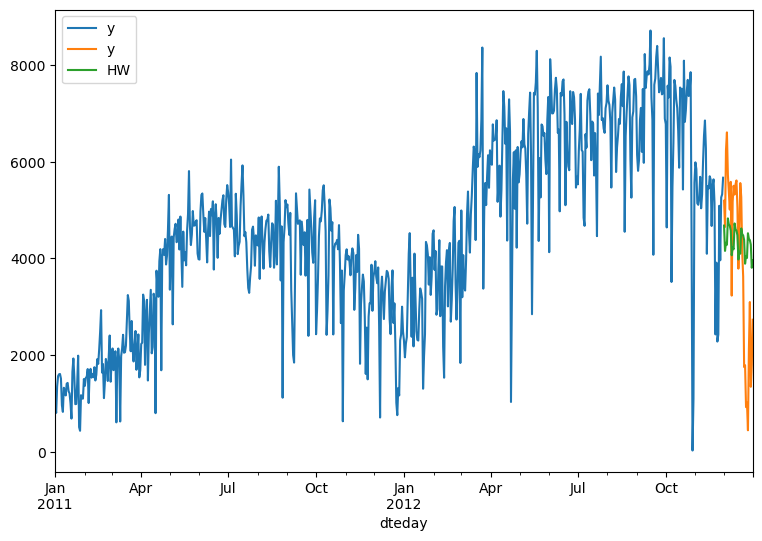

In [21]:
# visualization
training_set['y'].plot(figsize=(9,6),legend=True)
test_set['y'].plot(legend=True)
predictions_X.plot(legend = True)

<AxesSubplot: xlabel='dteday'>

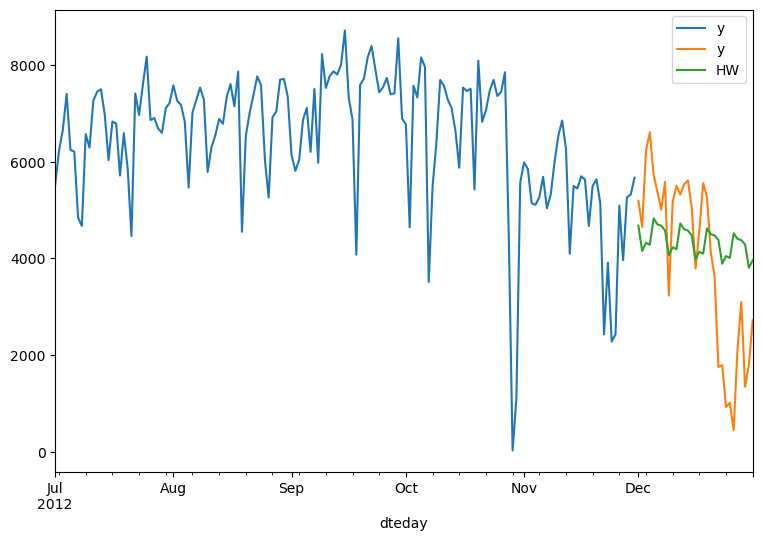

In [22]:
# visualization para los ultimos 6 meses
training_set['y']['2012-07-01':].plot(figsize=(9,6),legend=True)
test_set['y'].plot(legend=True)
predictions_X.plot(legend = True)

In [23]:
# MAE and RMSE
from sklearn.metrics import mean_absolute_error, mean_squared_error
print(round (mean_absolute_error(test_set['y'], predictions_X),0))
print(round(np.sqrt(mean_squared_error(test_set['y'], predictions_X)), 0))

1389.0
1698.0


In [24]:
# MAPE function
def MAPE(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true-y_pred) / y_true)) * 100
MAPE(test_set['y'], predictions_X)

87.26099293841784

# EXPORTAR PRONOSTICOS

In [25]:
%cd C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python

C:\Users\leoma\Desktop\projects\Modelos-de-Pronosticos-Series-Temporales-Python\Ensemble


In [26]:
predictions_X.to_csv('predictions_hw.csv', index=True)